# Assignment A2 [40 marks]

The assignment consists of 3 exercises. Each exercise may contain coding and/or discussion questions.
- Type your **code** in the **code cells** provided below each question.
- For **discussion** questions, use the **Markdown cells** provided below each question, indicated by 📝. Double-click these cells to edit them, and run them to display your Markdown-formatted text. Please refer to the Week 1 tutorial notebook for Markdown syntax.

---
## Question 1: Numerical Differentiation [10 marks]

A general $N$-point finite difference approximation of the derivative $F' \left( x \right)$ of a sufficiently smooth function $F \left( x \right)$ can be written as

$$
F' \left( x \right) \approx \frac{1}{\Delta x} \sum_{i = 1}^N \alpha_i F \left( x + \beta_i \Delta x \right),
\qquad \qquad \qquad (1)
$$

with step size $\Delta x > 0$, and $\alpha_i, \beta_i \in \mathbb{Q}$, with $\beta_i \neq \beta_j$ for $i\neq j$. For example, the centred difference approximation $D_C(x)$ seen in the course has $N = 2$, and

$$
\begin{cases}
\alpha_1 = \frac{1}{2}, &\alpha_2 = -\frac{1}{2}, \\
\beta_1 = 1, &\beta_2 = -1,
\end{cases}
\qquad
\text{giving} \quad
F'(x) \approx \frac{1}{2\Delta x} \left(F\left(x + \Delta x\right) - F\left(x - \Delta x\right)\right).
$$

**1.1** Consider another finite difference approximation defined as in $(1)$, this time with $N=3$, and

$$
\begin{cases}
\alpha_1 = -\frac{4}{23}, &\alpha_2 = -\frac{9}{17}, &\alpha_3 = \frac{275}{391} \\
\beta_1 = -\frac{3}{2}, &\beta_2 = -\frac{1}{3}, &\beta_2 = \frac{4}{5}
\end{cases}.
$$

Investigate the accuracy of this approximation.

**[5 marks]**

dx =  [0.005  0.0075 0.01   0.0125 0.015  0.0175 0.02   0.0225 0.025  0.0275
 0.03   0.0325 0.035  0.0375 0.04   0.0425 0.045  0.0475 0.05  ]

 F_derivative_approx = [-0.7787851  -0.7787655  -0.77873807 -0.7787028  -0.77865971 -0.77860879
 -0.77855006 -0.77848351 -0.77840914 -0.77832698 -0.77823701 -0.77813926
 -0.77803371 -0.77792039 -0.7777993  -0.77767045 -0.77753384 -0.77738948
 -0.77723739]

 F_derivative_error = [1.56814947e-05 3.52799026e-05 6.27131568e-05 9.79780750e-05
 1.41071085e-04 1.91988224e-04 2.50725138e-04 3.17277082e-04
 3.91638919e-04 4.73805120e-04 5.63769763e-04 6.61526533e-04
 7.67068722e-04 8.80389230e-04 1.00148056e-03 1.13033483e-03
 1.26694375e-03 1.41129865e-03 1.56339046e-03]

 The errors decrease approximately quadratically(via inspection) with the decreasing step size  Δx 
When the step size is halved, the error magnitude decreases quadratically i.e \ This all suggests that the difference approximation is second order accurate.

 slope of the line gives
1.

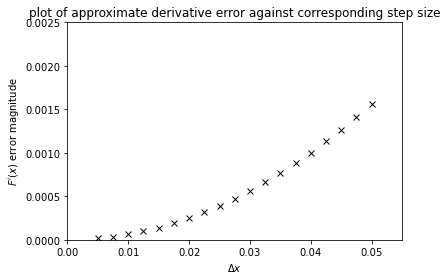

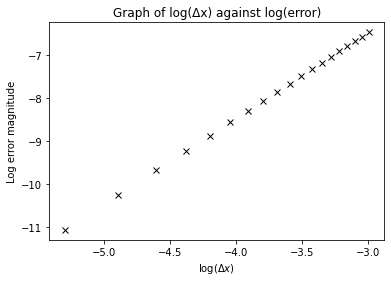

with the slope being approximately 2 , this would conclude the derivative appproximation is second degree accurate 


In [4]:
import numpy as np
import matplotlib.pyplot as plt

#functions for F(x) and F'(x)
def F(x):
    return np.exp(-x ** 2)


#F'(x)= -2e^{-x^2}x
def F_derivative(x):
    return -2.0 * x * F(x)


# Test different values of the step size
x = 0.5
dx = np.linspace(0.005 , 0.05 , 19)
print('dx = ', dx)
#dx = np.array([0.04, 0.02, 0.01, 0.005])

# Calculate the approximation for all step sizes at once
F_derivative_approx = (1. / dx) * (-4/23 * F(x - 3/2 * dx) - 9/17 * F(x - 1/3 * dx) + 275/391 * F(x + 4/5 * dx))
print('\n F_derivative_approx =', F_derivative_approx)

# Calculate the absolute error
F_derivative_error = np.abs(F_derivative_approx - F_derivative(x))
print('\n F_derivative_error =', F_derivative_error)

# Plot the results


fig, ax = plt.subplots()
ax.plot(dx, F_derivative_error, "kx")

# Label and tidy up the plot
ax.set(xlabel=r"$\Delta x$", ylabel=r"$F' \left( x \right)$ error magnitude", title="absolute error against dx  ")
ax.set_xlim([0.0, dx.max() * 1.1])
ax.set_ylim([0.0, 0.0025])
plt.title("plot of approximate derivative error against corresponding step size")

plt.show

print('\n The errors decrease approximately quadratically(via inspection) with the decreasing step size  Δx ')


print('When the step size is halved, the error magnitude decreases quadratically i.e \ This all suggests that the difference approximation is second order accurate.')

fig, ax = plt.subplots()
ax.plot(np.log(dx), np.log(F_derivative_error), "kx")
#when the step size is halved, the error magnitude

# Label the plot
ax.set(xlabel="$\log(\Delta x)$", ylabel="Log error magnitude", title="Graph of log(Δx) against log(error)")

# Compute and print the slope of the line
print('\n slope of the line gives')
print(np.polyfit(np.log(dx), np.log(F_derivative_error), 1)[0])


plt.show()

print('with the slope being approximately 2 , this would conclude the derivative appproximation is second degree accurate ')

**1.2** For an arbitrary choice of $\beta_i$ values, what is the minimum number of points $N_{p}$ required to find an approximation $(1)$ which is at least $p$th order accurate?

*Hint:* consider the Taylor expansion of $F \left( x + \beta_i \Delta x \right)$ around $x$.

**[3 marks]**

***📝 Discussion for question 1.2***


see attached pdf named 1.2


**1.3** Using your reasoning from **1.2**, write a function `FD_coefficients()` which, given $N_p$ values $\beta_i$, returns $N_p$ coefficients $\alpha_i$ such that the approximation $(1)$ is at least $p$th order accurate.

Use your function to obtain the coefficients $\alpha_i$ from **1.1**.

**[2 marks]**

---
## Question 2: Root Finding [10 marks]

Consider the following polynomial of cubic order,

$$
p(z) = z^3 + (c-1)z - c,
$$
where $c \in \mathbb{C}$.

This polynomial is complex differentiable, and we can apply Newton's method to find a complex root $z_\ast$, using a complex initial guess $z_0 = a_0 + ib_0$. In this problem, we seek to map the values of $z_0$ which lead to convergence to a root of $p$.

**2.1** Write a function `complex_newton(amin, amax, bmin, bmax, c, N, eps, target_roots)` which implements Newton's method to find roots of $p(z)$ using $N^2$ initial guesses $z_0 = a_0 + ib_0$. The input arguments are as follows:

- The real part $a_0$ of the initial guess should take `N` linearly spaced values between `amin` and `amax` (inclusive).
- The imaginary part $b_0$ of the initial guess should take `N` linearly spaced values between `bmin` and `bmax` (inclusive).
- `c` is the parameter $c \in \mathbb{C}$ in $p(z)$.
- `eps` is the tolerance $\varepsilon > 0$.
- `target_root` takes one of the following values:
    - if `target_root` is given as `None`, then convergence should be considered as achieved if Newton's method has converged to any root of $p$.
    - if `target_root` is given as a number, then convergence should only be considered as achieved if Newton's method has converged to the specific root $z_\ast =$ `target_root`.

Your function should return an array `kmax` of size $N \times N$, containing the total number of iterations required for convergence, for each value of $z_0$. You should decide what to do in case a particular value of $z_0$ doesn't lead to convergence.
    
Up to 2 marks will be given to solutions which iterate over each value of $z_0$. To obtain up to the full 4 marks, your implementation should be vectorised -- i.e. use a single loop to iterate Newton's method for all values of $z_0$ at once.

**[4 marks]**

In [157]:
import numpy as np
import matplotlib.pyplot as plt

#initial guess z_o = a_o +b_o * i 
#c = complex number dtype
def p(z):
    return z ** 3 + (c - 1) * z - c 

def dp(z): #first order differential 
    return 3 * z ** 2 + c - 1 
#essentially they arent asking to find all the roots, just the number of iterations needed to reach any root or a specific root

N = 3


def complex_newton(amin, amax, bmin, bmax, c, N, eps, target_roots):
    
    # essentially we are doing Matrix addition to find the NxN matrix denoted M 
    A = np.zeros([N,N])
    B = np.zeros([N,N] , dtype= complex)
    real_inputs = np.linspace(amin, amax, N)
    im_inputs = np.linspace(bmin * 1j, bmax * 1j, N )

    A[:] = real_inputs #here we fill each row with the corresponding inputs 
    B[:] = im_inputs

    z0 = A.T + B # A transpose + B , will give us our desired real + complex matrix of inputs 
    
    
    if target_roots == 'none': # this one can converge to any root i.e just apply the newton formula 
        for x0 in z0: # each x0 are the rows(arrays ), so looping over each row
            
            while True:
                its += 1 #number of iterations needed 
                x_new = x0 - p(x0)/dp(x0)
                
                if abs(x_new - x0) < eps: # convergence achieved
                    break
                
                
                x0 = x_new
    

**2.2** For $c = 0$, $a_0 \in [-5,5]$ and $b_0 \in [-5,5]$, with at least $N = 200$ values for each (you can increase $N$ if your computer allows it), use your function `complex_newton()` to calculate, for each $z_0 = a_0 + ib_0$, the total number of iterates needed to reach a disk of radius $\varepsilon$ around the root at $z = 1$. Present your results in a heatmap plot, with $a_0$ on the abscissa, $b_0$ on the ordinate and a colour map showing the total number of iterates. 

**[3 marks]**

In [126]:
bmin = 2
bmax =  6
amin = 2 
amax = 6
N = 3

c = 10
eps =  1e-8

A = np.zeros([N,N])
B = np.zeros([N,N] , dtype= complex)
real_inputs = np.linspace(amin, amax, N)
im_inputs = np.linspace(bmin * 1j, bmax * 1j, N )

A[:] = real_inputs #here we fill each row with the corresponding inputs 
B[:] = im_inputs

z0 = A.T + B # A transpose + B , will give us our inputs

print(z0)

its =  0
# each x0 are the rows(arrays ), so looping over each row
while True:
    its += 1 #number of iterations needed 
    x_new = z0 - p(z0)/dp(z0)
    if a.all(abs(x_new - z0)) < eps: # convergence achieved
        break
                
                
    z0 = x_new
        
print(its)
print(x_new)


[[2.+2.j 2.+4.j 2.+6.j]
 [4.+2.j 4.+4.j 4.+6.j]
 [6.+2.j 6.+4.j 6.+6.j]]


TypeError: only integer scalar arrays can be converted to a scalar index

In [122]:
bmin = 2
bmax =  6
amin = 2 
amax = 6
N = 3

c = 10
eps =  1e-10

A = np.zeros([N,N])
B = np.zeros([N,N] , dtype= complex)
real_inputs = np.linspace(amin, amax, N)
im_inputs = np.linspace(bmin * 1j, bmax * 1j, N )

A[:] = real_inputs #here we fill each row with the corresponding inputs 
B[:] = im_inputs

z0 = A.T + B # A transpose + B , will give us our inputs


#print(z0)

iterations = []
its =  0
for x0 in np.nditer(z0): # each x0 are the rows(arrays ), so looping over each row
    while True:
        its += 1 #number of iterations needed 
        x_new = x0 - p(x0)/dp(x0)
        np.append(iterations, its)
    
    
        if (abs(x_new - x0)) < eps:# convergence achieved
            break
                
                
        x0 = x_new
        
print(its)
print(x_new)
print(iterations)

80
(1+0j)
[]


**2.3** For $c = 0.32 + 1.64i$, map out the points $z_0$ for which Newton's method does not converge to any root. What does it do instead?

*Hint:* Pick a point $z_0$ in a region where Newton's method does not converge and print out, say, 50 iterates. What do you observe?

**[3 marks]**

***📝 Discussion for question 2.3***

---
## Question 3: Numerical Integration of an ODE [20 marks]

Cardiac tissue is an example of an excitable medium, where a small stimulus can lead to a large response (a heart beat). The FitzHugh-Nagumo model describes the electrical activity of a single cardiac cell in terms of the transmembrane potential $u$ and a recovery variable $v$

\begin{align}
        \dot u & = f(u,v) = \frac{1}{\varepsilon} \left( u - \frac{u^3}{3} - v + I \right) \ , \\
        \dot v & = g(u,v) = \varepsilon \left( u - \gamma v + \beta \right) \ ,
\end{align}

where $I$ (a stimulus), $\varepsilon$, $\gamma$, and $\beta$ are known parameters.

The equation for $u$ leads to fast dynamics with the possibility of excitation, while the linear term proportional to $-v$ in the equation for the recovery variable produces slower dynamics and negative feedback. The FitzHugh-Nagumo model is an example of a stiff differential equation, where the stiffness becomes more pronounced for smaller $\varepsilon$.

In questions **3.1**, **3.2**, and **3.3**, we take $\varepsilon = 0.2$, $\gamma = 0.8$, and $\beta = 0.7$.


**3.1** The fixed points, defined by $\dot u = f(u, v) = 0$ and $\dot v = g(u, v) = 0$, correspond to the state of a cell at rest. Write a function `resting_state()` to determine the values $(u_I^*, v_I^*)$ for the cell in its resting state for a given value of $I$ and a given initial guess $(u_{I, 0}, v_{I, 0})$, using Newton's method.

Use your function to compute $(u_I^*, v_I^*)$ for $I=0$ and $I = 0.5$, with initial guess $(u_{I, 0}, v_{I, 0}) = (0.2, 0.2)$.


**[5 marks]**

In [124]:
import numpy as np



maxiter = 1000 # to ensure we do not get stuck in an infinite loop

epsilon = 0.2
gamma = 0.8 
beta = 0.7


#defining the
def f(u,v,I):
    return (1 / epsilon) * ( u - (u**3)/3 - v + I )

def g(u,v,I):
    return epsilon * ( u - (gamma * v) + beta )

def Jac(u, v): #jacobian found analytically
    J = np.zeros([2, 2])
    J[0, 0] = (1 - u**2) / epsilon
    J[0, 1] = -(1/epsilon)
    J[1, 0] = epsilon 
    J[1, 1] = -(epsilon * gamma)
    return J

def resting_state(u, v, I):
    '''
    Finds the cell's resting points using Newton's method 
    '''

    x_0 = np.array([u, v])#initial guess into an array
    i = 0 #iterations starting count 
    error = 100 #pick any large value for the initial error 
    tol =  1e-20
    while np.any(abs(error) > tol) and i < maxiter:
        def F(u,v, I): #input the guesses into f and g then form an array
            return np.array([f(u,v,I),g(u,v,I)]) 
    
        x_new = x_0 - np.linalg.inv(Jac(x_0[0], x_0[1]))@F(x_0[0], x_0[1], I) #x_n+1 = x_0 -Jac^-1 *F(x)
        error = x_new -x_0
        x_0 = x_new
    
        i += 1 #begin counting iterations
        #print(i)
    return x_new

print('for I = 0')
print(resting_state(0.2, 0.2, 0))

print('for I = 0.5') 
print(resting_state(0.2, 0.2, 0.5))
    
    


for I = 0
[-1.19940804 -0.62426004]
for I = 0.5
[-0.80484775 -0.13105968]


<IPython.core.display.Javascript object>


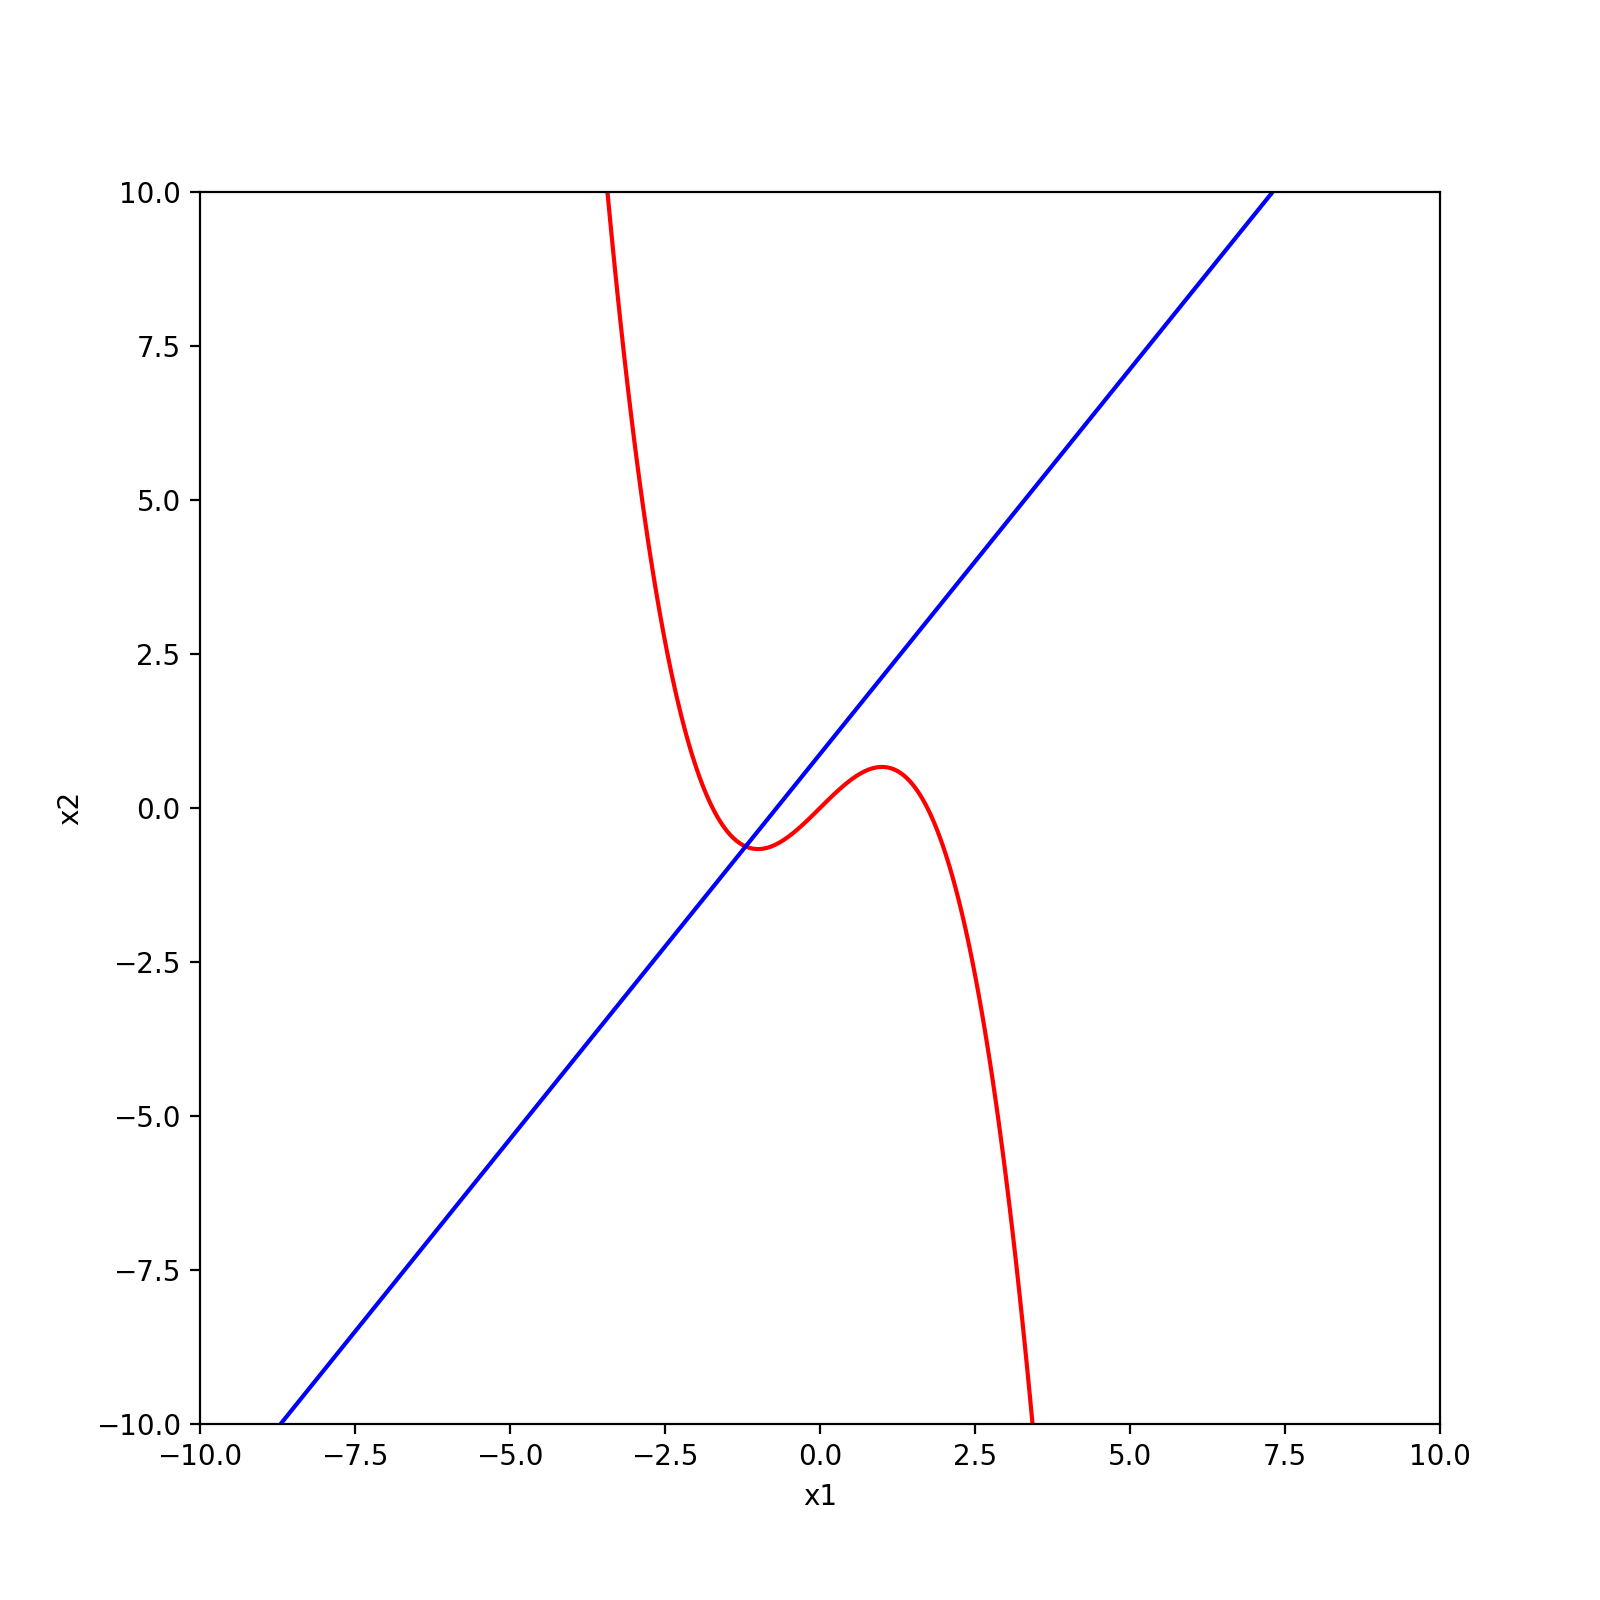

<ipython-input-125-9952abd1e0c3>:22: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X, Y, f(X, Y, 0), 0, colors='r', label = 'u')
<ipython-input-125-9952abd1e0c3>:23: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X, Y, g(X, Y, 0), 0, colors='b',label = 'v')


<IPython.core.display.Javascript object>


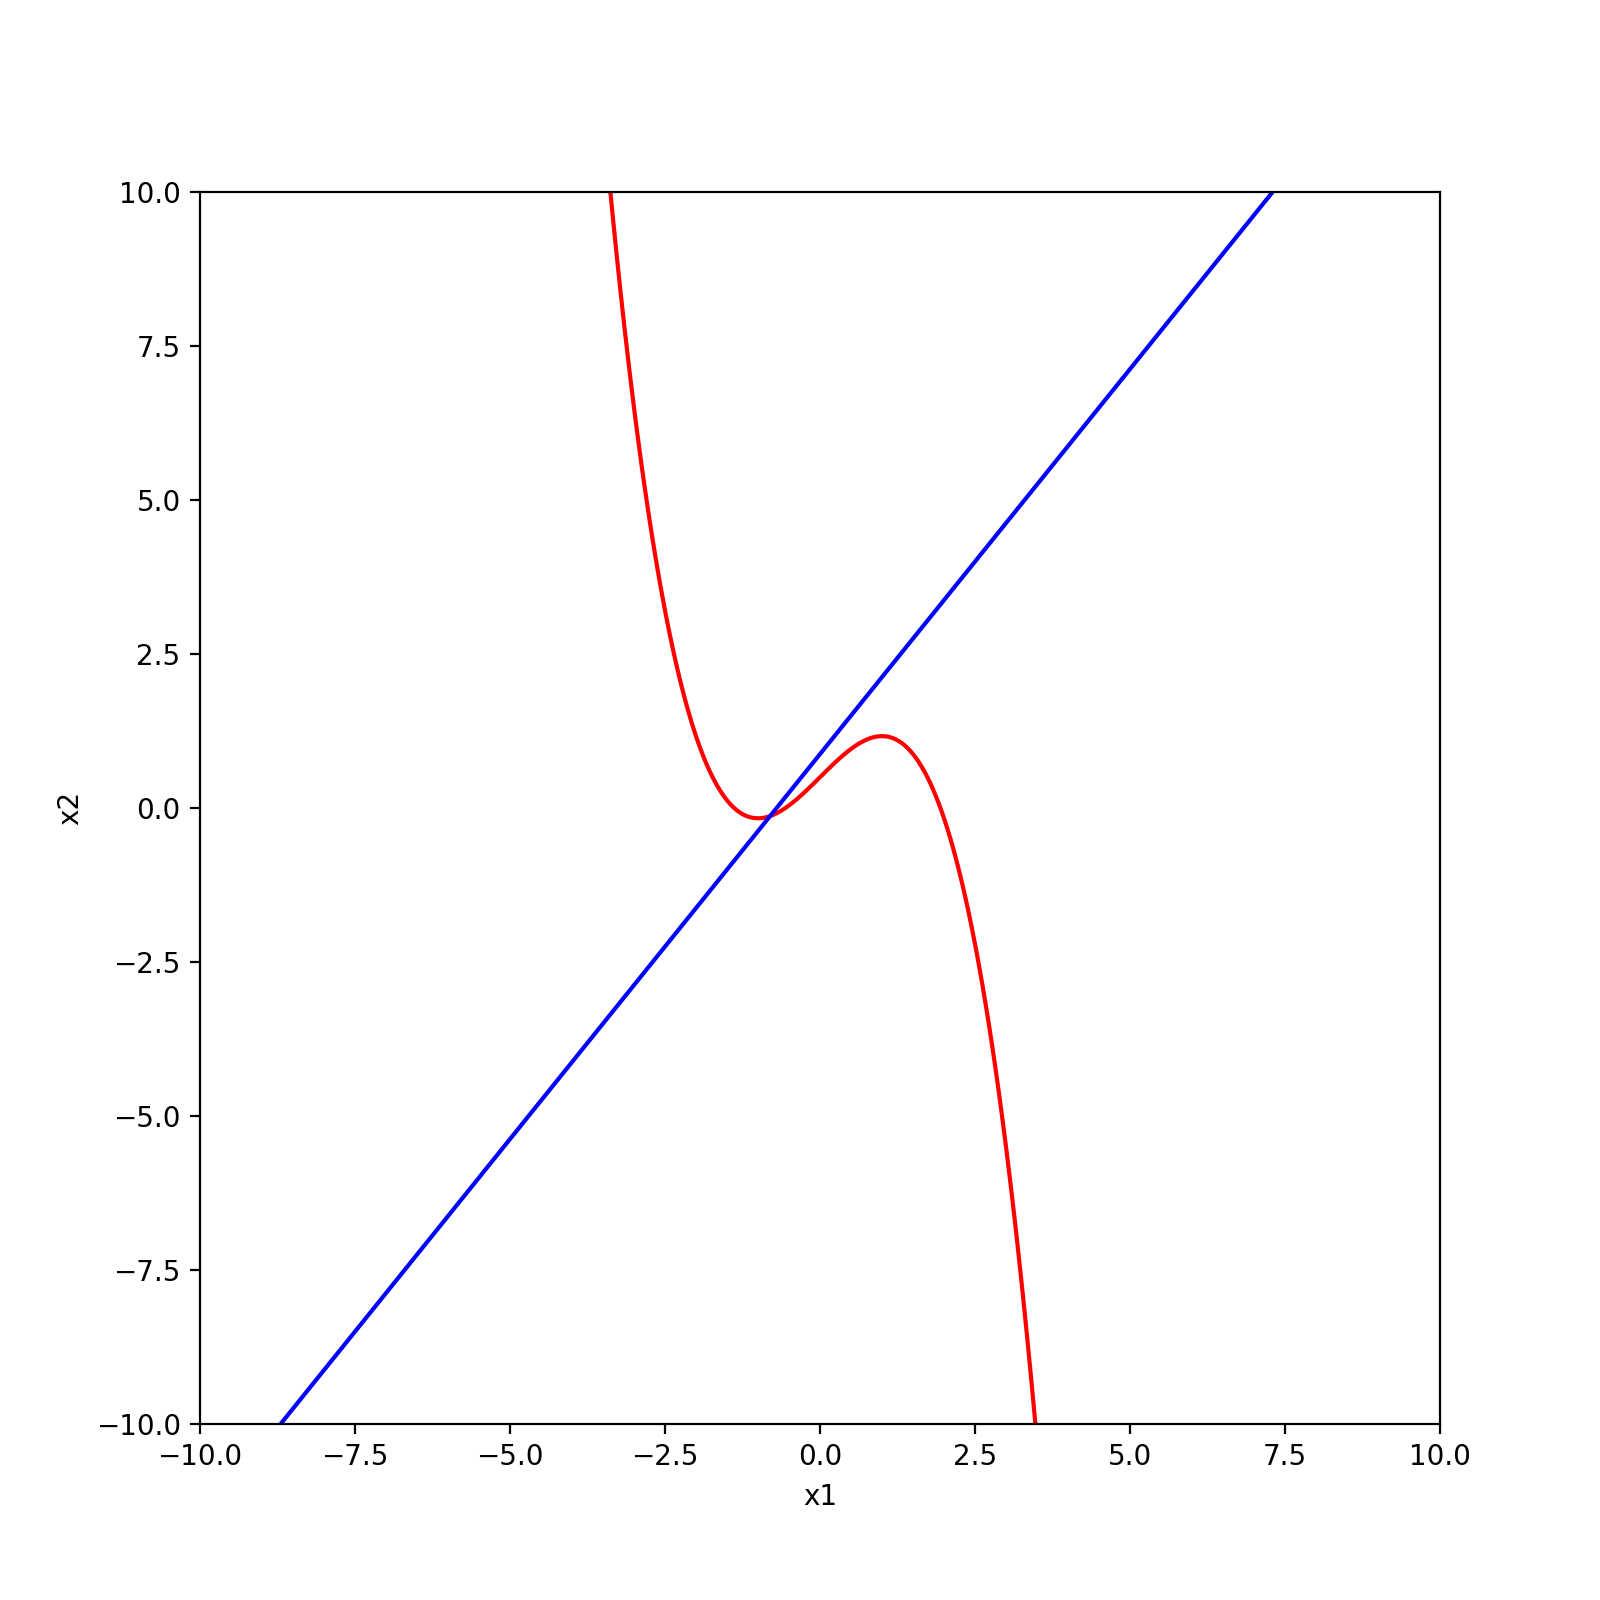

In [125]:
import numpy as np 
import matplotlib.pyplot as plt
#illustration for above

I = 0
roots = []

def f(u,v,I):
    return (1 / epsilon) * ( u - (u**3)/3 - v + I )

def g(u,v,I):
    return epsilon * ( u - gamma * v + beta )

#visualisation
xmin, xmax = -10,10
ymin, ymax = -10,10
X, Y = np.meshgrid(np.linspace(xmin, xmax, 500), np.linspace(ymin, ymax, 500))

# Create a contour plot to display the intersection of
# z =f(u,v,I) and z =g(u,v,I) with the plane z = 0
fig, ax = plt.subplots(figsize=(8, 8))
ax.contour(X, Y, f(X, Y, 0), 0, colors='r', label = 'u')
ax.contour(X, Y, g(X, Y, 0), 0, colors='b',label = 'v')
ax.legend
ax.set(xlabel='x1', ylabel='x2', xlim=[xmin, xmax], ylim=[ymin, ymax])
plt.show()


#I = 0.5

#visualisation
xmin, xmax = -10,10
ymin, ymax = -10,10
X, Y = np.meshgrid(np.linspace(xmin, xmax, 500), np.linspace(ymin, ymax, 500))

# Create a contour plot to display the intersection of
# z =f(u,v,I) and z =g(u,v,I) with the plane z = 0
fig, ax = plt.subplots(figsize=(8, 8))
ax.contour(X, Y, f(X, Y, 0.5), 0, colors='r')
ax.contour(X, Y, g(X, Y, 0.5), 0, colors='b')

ax.set(xlabel='x1', ylabel='x2', xlim=[xmin, xmax], ylim=[ymin, ymax])
plt.show()


    

**3.2** Using the method of your choice **\***, compute the numerical solution $(u_n, v_n) \approx (u(n\Delta t), v(n\Delta t)), n=0, 1, 2, \dots$ for the FitzHugh-Nagumo model.

You should compute the solution for both $I = 0$ and $I = 0.5$, starting at time $t = 0$ until at least $t = 100$, with $(u_0 = 0.8, v_0 = 0.8)$ as the initial condition.

Present your results graphically by plotting

(a) $u_n$ and $v_n$ with **time** (not time step) on the x-axis,  
(b) $v_n$ as a function of $u_n$. This will show what we call the solution trajectories in *phase space*.

You should format the plots so that the data presentation is clear and easy to understand.

Given what this mathematical model describes, and given that $I$ represents a stimulus, how do you interpret your results for the two different values of $I$? Describe your observations in less than 200 words.


**\*** You may use e.g. the forward Euler method seen in Week 7 with a small enough time step, or use one of the functions provided by the `scipy.integrate` module, as seen in Quiz Q4.


**[7 marks]**

Here, we will assume the units for U and V are given as transmembrane potential


<IPython.core.display.Javascript object>


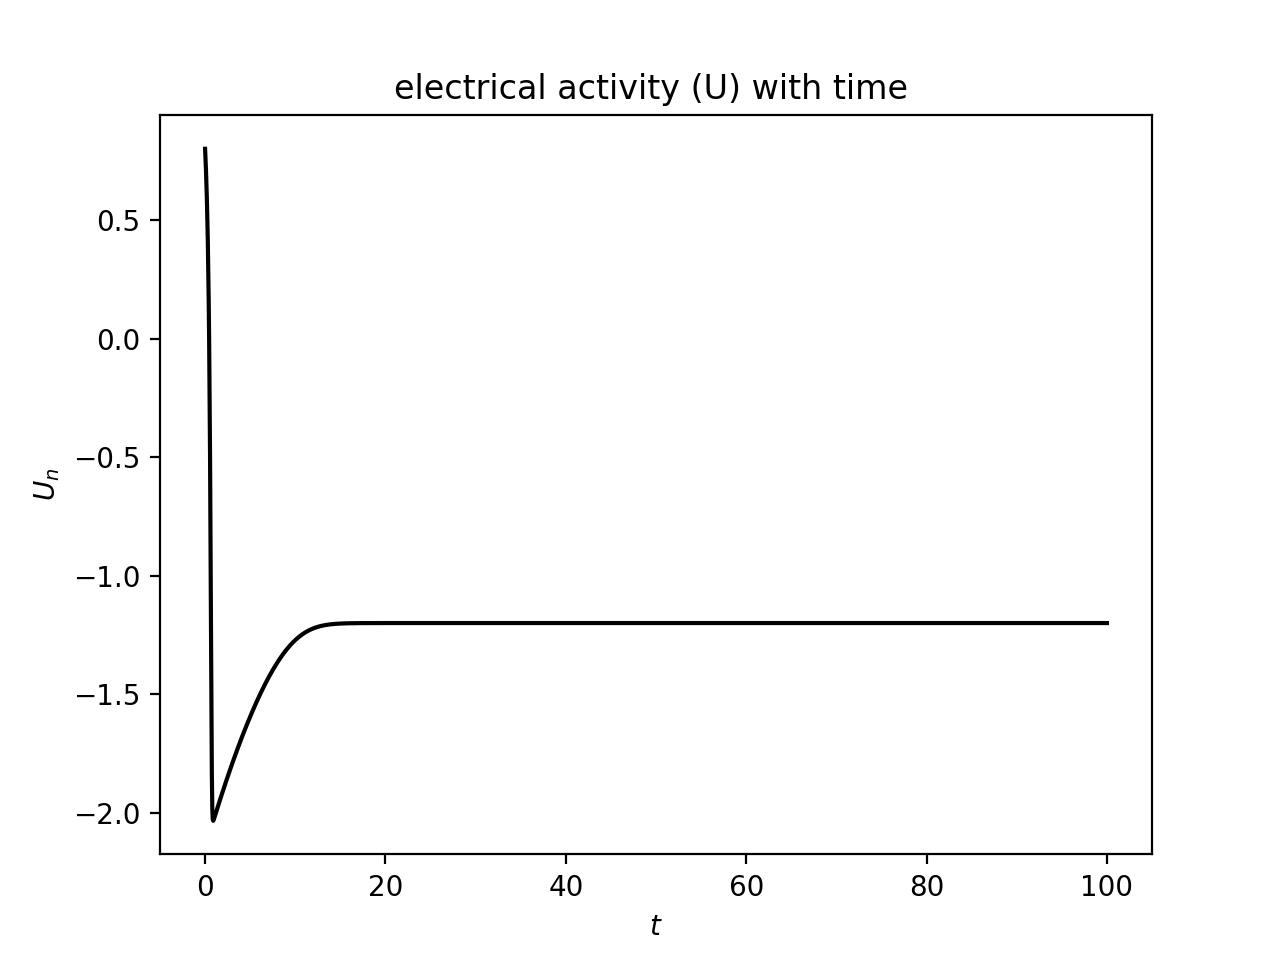

<IPython.core.display.Javascript object>


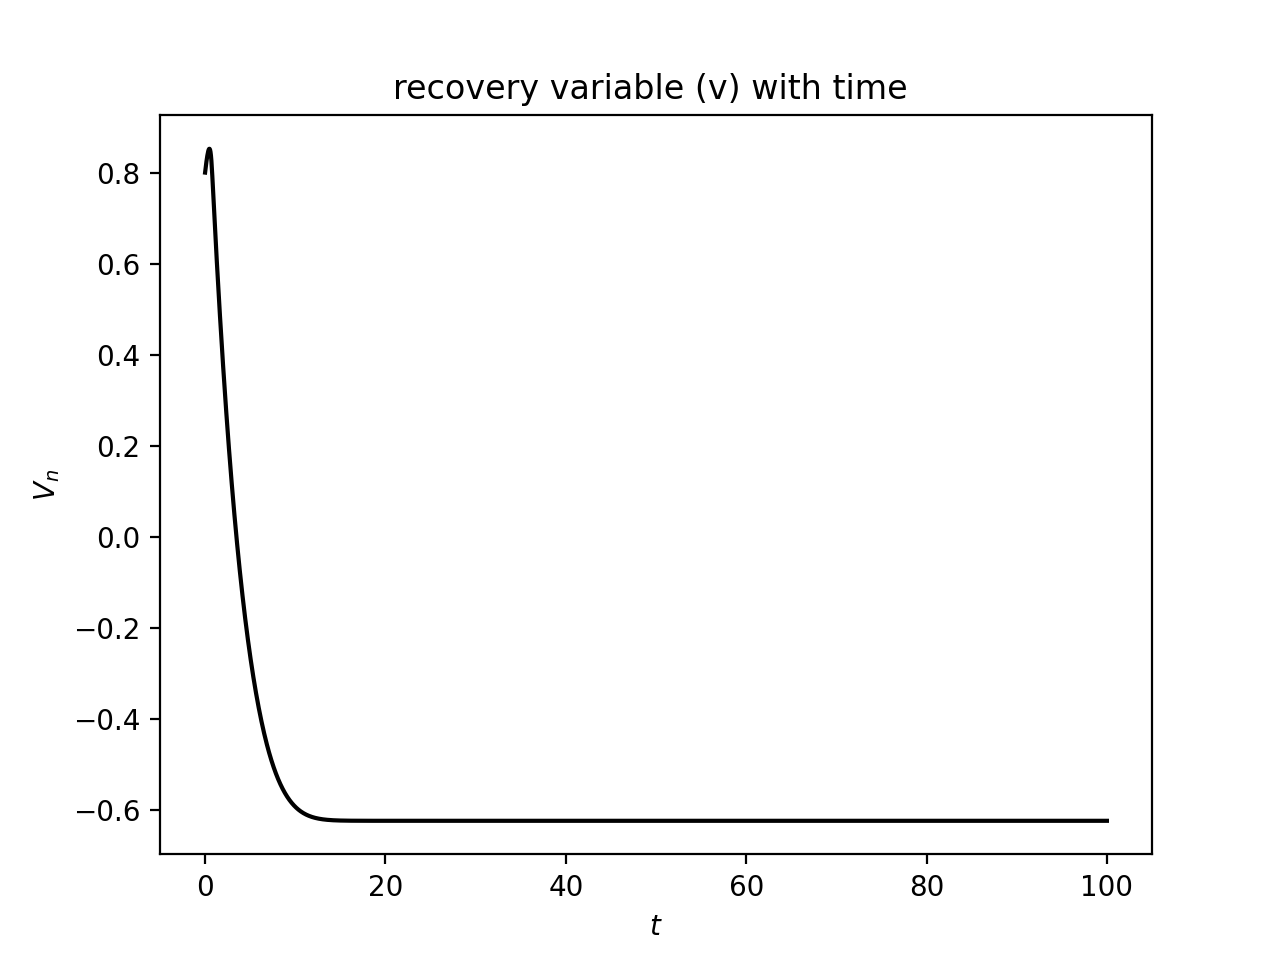

<IPython.core.display.Javascript object>


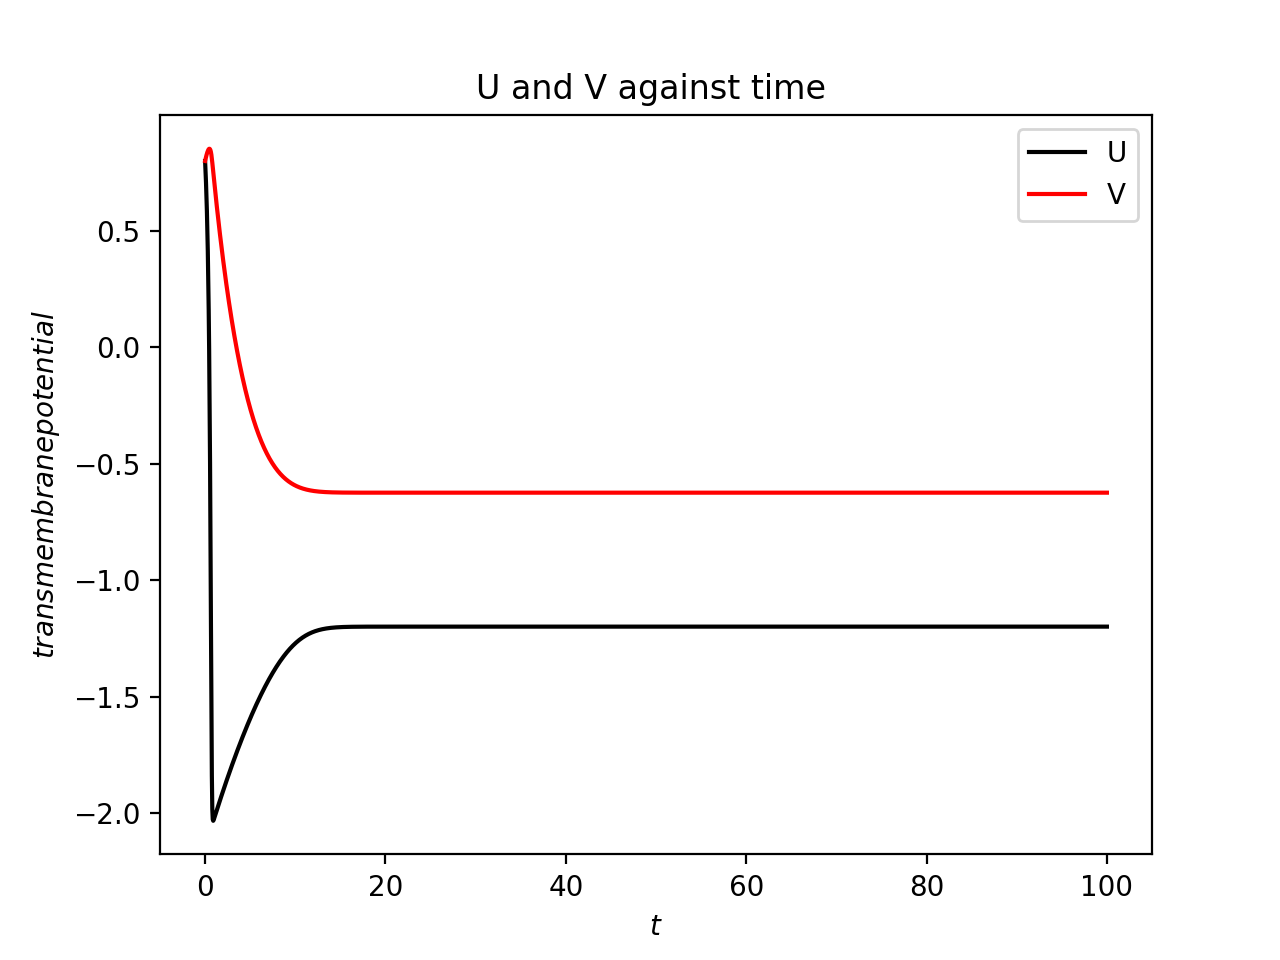

<IPython.core.display.Javascript object>


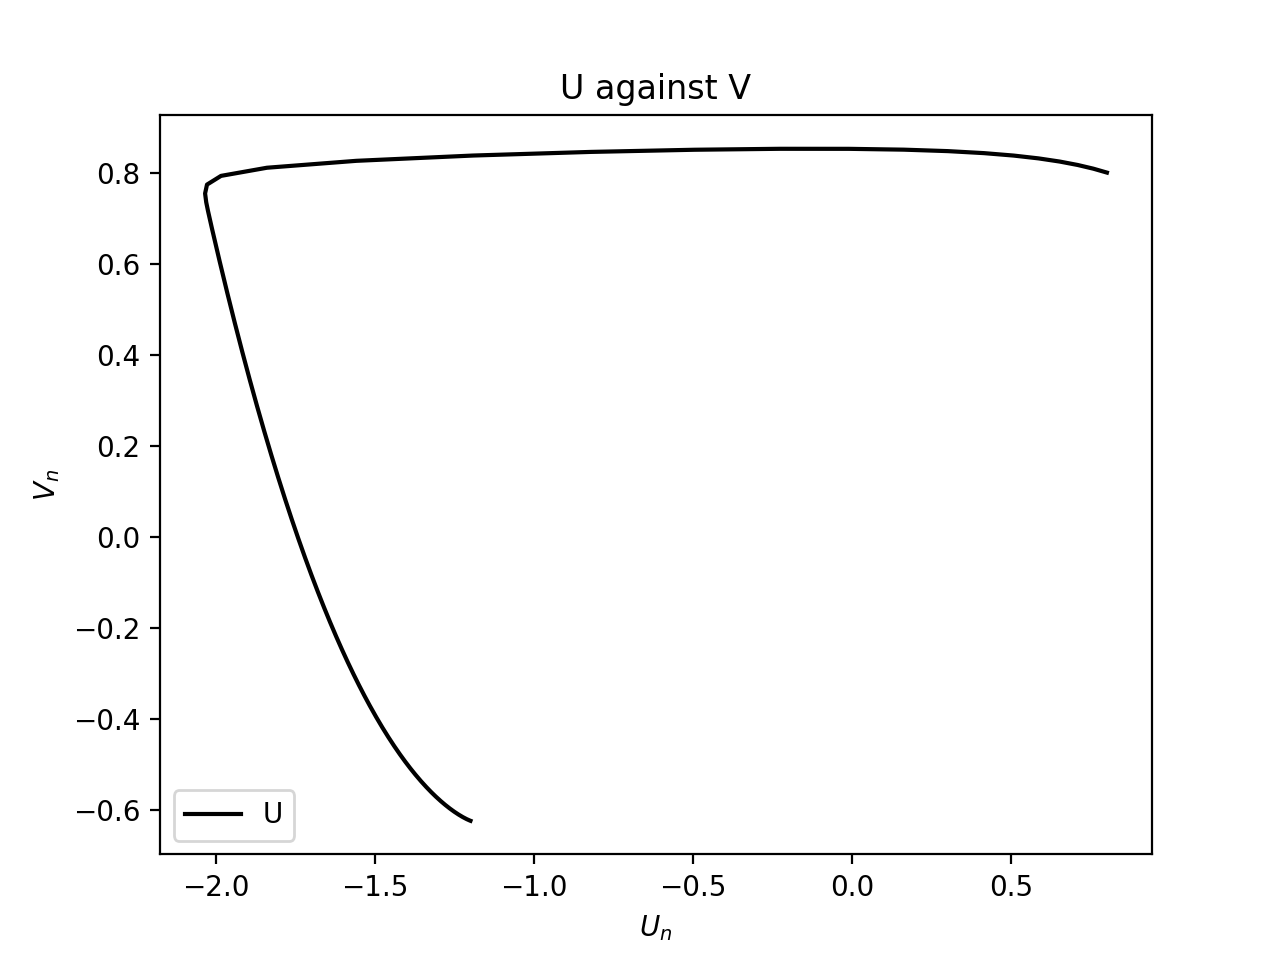

<function matplotlib.pyplot.show(*args, **kw)>

In [126]:
#for when I = 0
%matplotlib notebook

epsilon = 0.2
gamma = 0.8 
beta = 0.7

I = 0

def f(u,v,I):
    return (1 / epsilon) * ( u - (u**3)/3 - v + I )

def g(u,v,I):
    return epsilon * ( u - (gamma * v) + beta )


N = 2000 #number of points  
# Compute the time points
dt = (100 - 0)/ N #dt
t = np.linspace(0.0 , 100, N + 1)
U_arr = np.zeros(N + 1) #create empty array to store our U and V values
V_arr = np.zeros(N + 1)

#initial conditions at t=0
U_arr[0] = 0.8 #short for U_array
V_arr[0] = 0.8

#forward euler method such as that in week 7
for n in range(N):
    U_arr[n + 1] = f( U_arr[n], V_arr[n] , I) * dt + U_arr[n]
    V_arr[n + 1] = g( U_arr[n], V_arr[n], I) * dt + V_arr[n]
    

print('Here, we will assume the units for U and V are given as transmembrane potential')
    
#graphing Un against t and Vn against t seperately
fig, ax = plt.subplots()
ax.plot(t, U_arr, "k-")
ax.set(xlabel=r"$t$", ylabel=r"$U_n$")
plt.title("electrical activity (U) with time ")


plt.show()

fig, ax = plt.subplots()
ax.plot(t, V_arr, "k-")
ax.set(xlabel=r"$t$", ylabel=r"$V_n$")
plt.title("recovery variable (v) with time ")

plt.show()

#both graphs in one
fig, ax = plt.subplots()
ax.plot(t, U_arr, "k-", label = 'U')
ax.plot(t, V_arr, "r-", label = 'V')
ax.set(xlabel=r"$t$", ylabel=r"$transmembrane potential$")
ax.legend()
plt.title("U and V against time ")
plt.show()


#U_n against V_n
fig, ax = plt.subplots()
ax.plot(U_arr, V_arr, "k-", label = 'U')
ax.set(xlabel=r"$U_n$", ylabel=r"$V_n$")
ax.legend()
plt.title("U against V")

plt.show






<IPython.core.display.Javascript object>


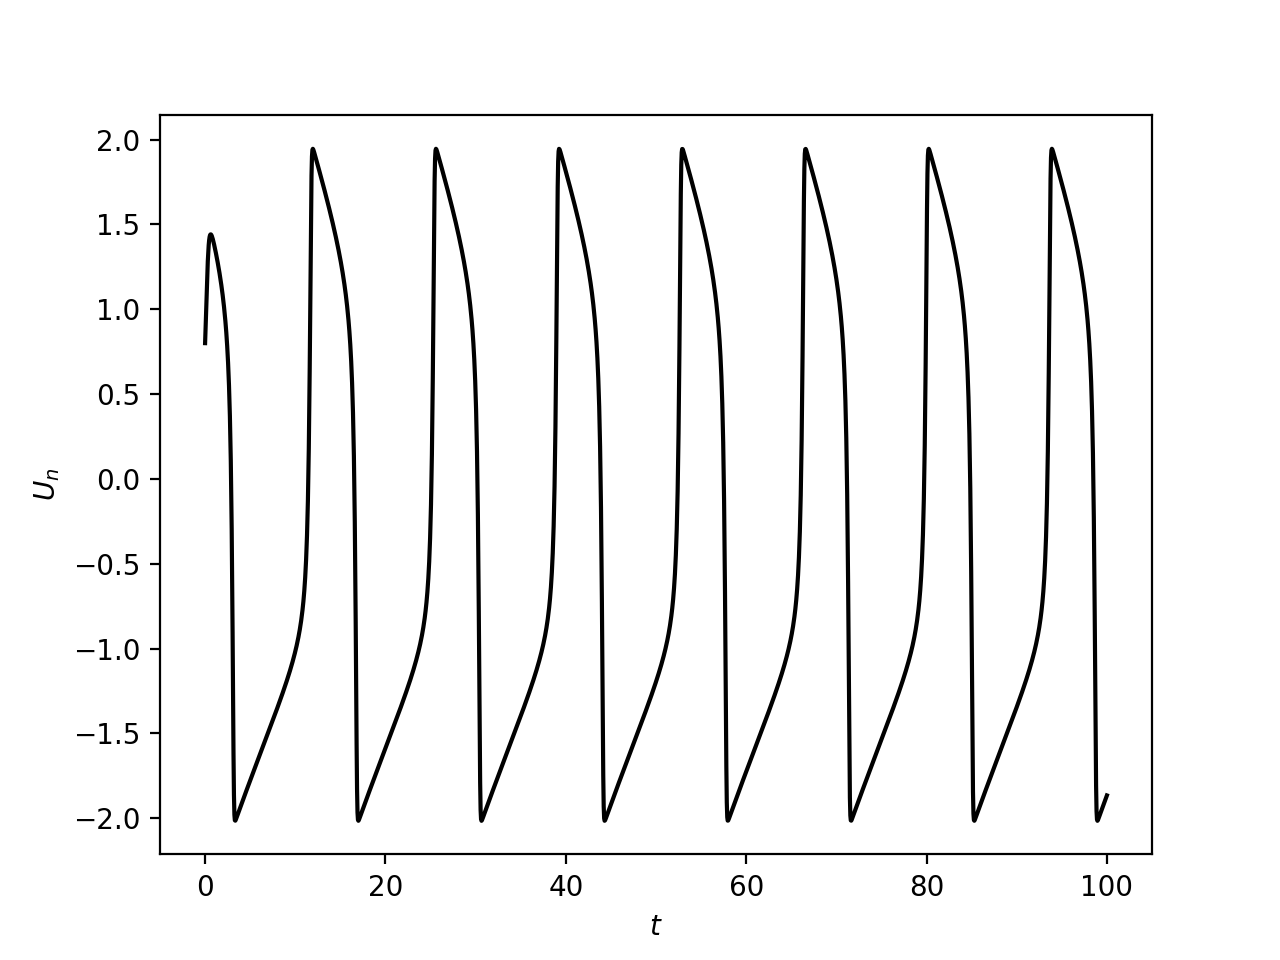

<IPython.core.display.Javascript object>


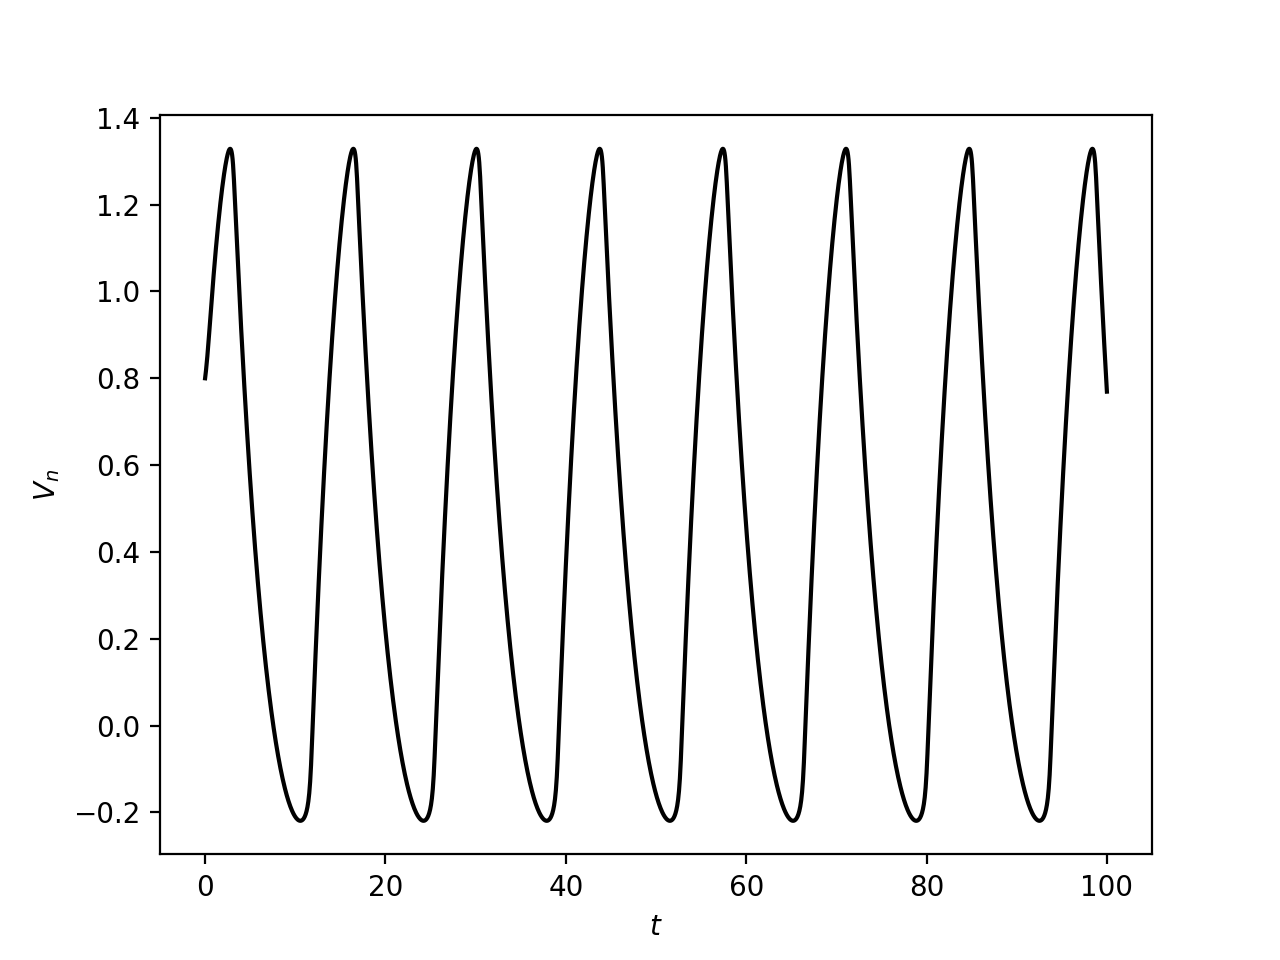

<IPython.core.display.Javascript object>


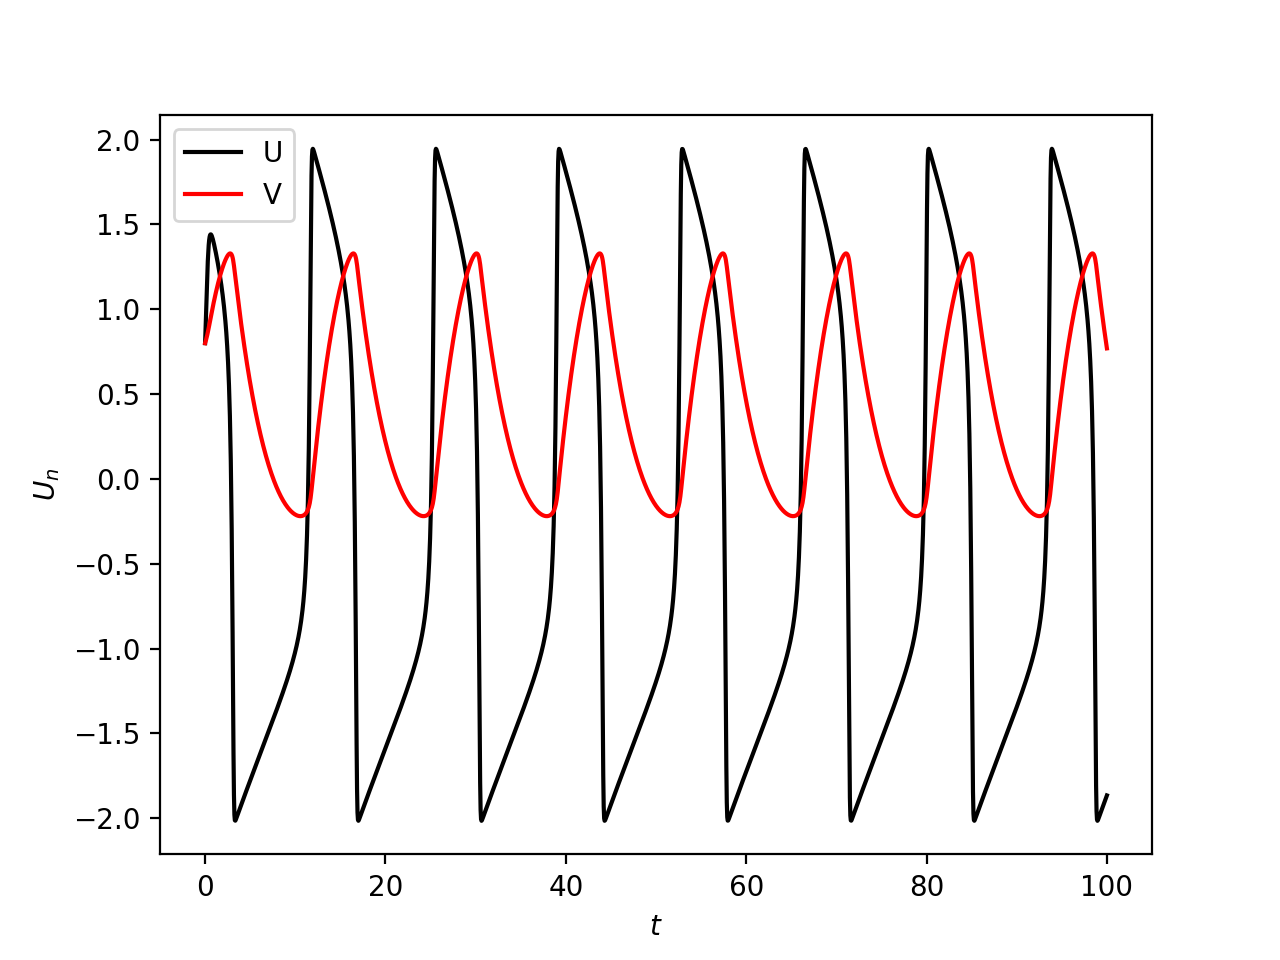

<IPython.core.display.Javascript object>


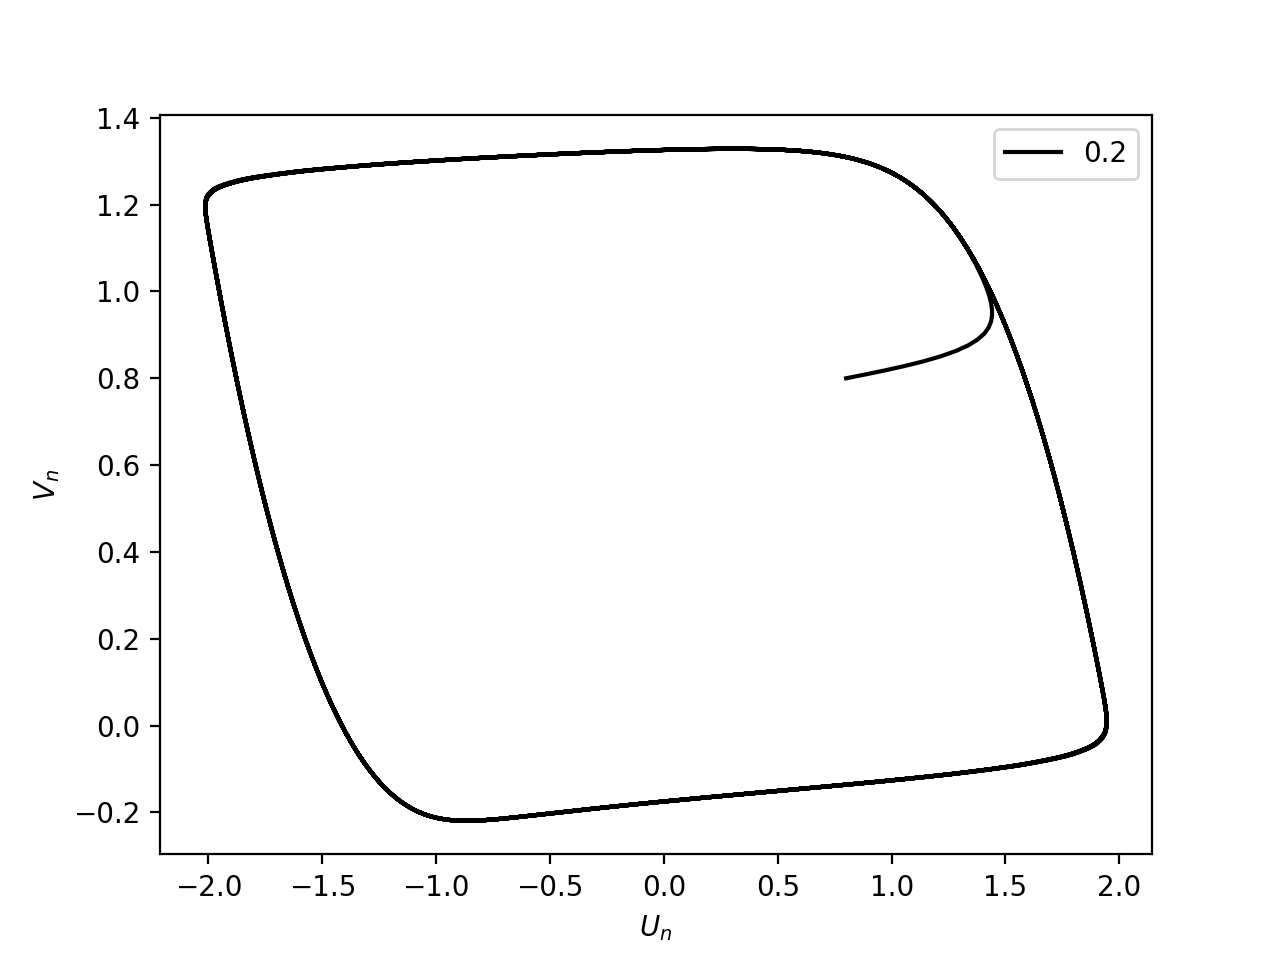

<function matplotlib.pyplot.show(*args, **kw)>

In [127]:
#for when I = 0.5

epsilon = 0.2
gamma = 0.8 
beta = 0.7

I = 0.5



N = 2000 #number of points  
# Compute the time points
dt = (100 - 0)/ N
t = np.linspace(0.0 , 100, N + 1)
U_arr = np.zeros(N + 1)#create empty array to store our U and V values
V_arr = np.zeros(N + 1)

#initial conditions at t=0
U_arr[0] = 0.8 #short for U_array
V_arr[0] = 0.8
t[0] = 0


for n in range(N):#forward euler method
    U_arr[n + 1] = f( U_arr[n], V_arr[n] , I) * dt + U_arr[n]
    V_arr[n + 1] = g( U_arr[n], V_arr[n], I) * dt + V_arr[n]
    

    
#graphing
fig, ax = plt.subplots()
ax.plot(t, U_arr, "k-")
ax.set(xlabel=r"$t$", ylabel=r"$U_n$")

plt.show()

fig, ax = plt.subplots()
ax.plot(t, V_arr, "k-")
ax.set(xlabel=r"$t$", ylabel=r"$V_n$")

plt.show()

#both graphs in one
fig, ax = plt.subplots()
ax.plot(t, U_arr, "k-", label = 'U')
ax.plot(t, V_arr, "r-", label = 'V')
ax.set(xlabel=r"$t$", ylabel=r"$U_n$")
ax.legend()

plt.show()


#U_n against V_n
fig, ax = plt.subplots()
ax.plot(U_arr, V_arr, "k-", label = '0.2')
ax.set(xlabel=r"$U_n$", ylabel=r"$V_n$")
ax.legend()

plt.show






***📝 Discussion for question 3.2***

Given what this mathematical model describes, and given that  𝐼  represents a stimulus, how do you interpret your results for the two different values of  𝐼 ? Describe your observations in less than 200 words.

**When I = 0**

1) Up to when t was approximately 10, U and V appears to have an inverse relationship. from t=10 onwards, it has reached equilibrium , as t tends to infiniy it will stay at this resting point.

2)a sharp decrease in U corresponded with a smaller increase in V, particularly for the miniscule amount of time near t = 0 .

3) Furthermore, the time at which it took to converge to u = -1.199 and v = -0.624 was approximately the same, despite U having a larger difference from the starting point than V.

4)Un against Vn graph 
This represents a phase plane, which is normally used to find limit cycles(a closed trajectory in the phase space such that at least one other trajectory spirals into it as time goes to infinity)  in the solutions of the differential equation. From U agaisnt t and V against t we find that it converges to a fixed point eventually, the graph here implies it is does not feature a closed loop of any kind hence always converges to the fixed point,

**when I=0.5**

1) again the inverse relationship between U and V exists here. both graphs of U and V against t, shows a periodic cycle approximately every 8 seconds/t. With V having smaller variations.

2)for the U against t graph, every cycle has a gradual increase/decrease (almost linear) followed by a sharp drop/rise at the end towards the maximum/minimums.

3)For the V against t graph, a sinusoidal pattern is observed. 

4)When I = 0.5, the U against V graph shows a stable limit cycle. a stable limit cycle is when where all the neighbouring trajectories approach the limit cycle as time approaches infinity, closed loop is observed.


**References**
En.wikipedia.org. 2021. Limit cycle - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Limit_cycle> [Accessed 19 April 2021].


**3.3** Compute the eigenvalues of the Jacobi matrix
        
$$
\large
\begin{pmatrix}
    \frac{\partial f}{\partial u} & \frac{\partial f}{\partial v} \\ 
    \frac{\partial g}{\partial u} & \frac{\partial g}{\partial v}
\end{pmatrix}_{u = u_I^*, v = v_I^*}
$$

evaluated at the fixed points $u = u_I^*, v = v_I^*$, for $I = 0$ and $I = 0.5$. What do you observe?

*You may use NumPy built-in functions to compute eigenvalues.*


**[3 marks]**

In [128]:
from numpy import linalg as LA

print('u*,v* for I = 0.5',resting_state(0.2, 0.2, 0.5))

#print(Jac(-0.80484775,-0.13105968))

evalue, evector = LA.eig(Jac(-0.80484775,-0.13105968))
print('\n Eigenvalues, I= 0.5', )
print(evalue)
print('\n corresponding eigenvectors, I = 0.5')
print(evector)
evalue, evector = LA.eig(Jac(-0.80484775,-0.13105968))

print('\nu*,v* for I = 0',resting_state(0.2, 0.2, 0))

evalue1, evector1 = LA.eig(Jac(-1.19940804,-0.62426004))

print('\n Eigenvalues, I= 0', )
print(evalue1)
print('\n corresponding eigenvectors, I = 0')
print(evector1)



u*,v* for I = 0.5 [-0.80484775 -0.13105968]

 Eigenvalues, I= 0.5
[0.80055025+0.27810649j 0.80055025-0.27810649j]

 corresponding eigenvectors, I = 0.5
[[0.98058068+0.j         0.98058068-0.j        ]
 [0.1883794 -0.05454117j 0.1883794 +0.05454117j]]

u*,v* for I = 0 [-1.19940804 -0.62426004]

 Eigenvalues, I= 0
[-1.35857217 -0.99432607]

 corresponding eigenvectors, I = 0
[[-0.98636215  0.97245028]
 [ 0.16458953 -0.23311037]]


***📝 Discussion for question 3.3***


**for I = 0.5 **

eigenvalues are both positive, intersection of eigenvectors represents an unstable node (the system/ eigenvectors diverges away from) . For any initial guess near this fixed point, the path will move away from it.

**for I = 0 **

Eigenvalues are both negative, eigenvectors intersect forming a stable node , where the system converges to. The fixed point is stable, around the basin of the fix point, an initial guess will converge towards this fixed point

**References**
En.wikipedia.org. 2021. Limit cycle - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Limit_cycle> [Accessed 19 April 2021].



**3.4** For this question, we set $I = 0$ and $\gamma = 5$.

(a) Use the function `resting_state()` you wrote for **3.1** to find three fixed points, $(u_{(0)}^*, v_{(0)}^*)$, $(u_{(1)}^*, v_{(1)}^*)$ and $(u_{(2)}^*, v_{(2)}^*)$, using the initial conditions provided in the NumPy array `uv0` below (each row of the array constitutes a pair of initial conditions for one of the three fixed points).

(b) Compute the numerical solution $(u_n, v_n), n=0, 1, 2, \dots$ using the initial condition $(u_{(0)}^* + \delta, v_{(0)}^* + \delta)$, for $\delta \in \{0, 0.3, 0.6, 1.0\}$. This simulates the activity of a cell starting at a small perturbation $\delta$ of one of its resting states, in this case $(u_{(0)}^*, v_{(0)}^*)$.

Plot your results in a similar way as in question **3.2**, and discuss your observations in less than 150 words. In particular, does the solution always return to the same fixed point, i.e. the same resting state?

**[5 marks]**

In [139]:
import numpy as np

#Question 3.4a
I = 0 
epsilon = 0.2
gamma = 5
beta = 0.7



print('fixed point 1 = ',resting_state(0.9, 0.6, 0))
u , v = resting_state(0.9, 0.6, 0)
evalue, evector = LA.eig(Jac(u,v ))
print('eigenvalue for first point =', evalue)

print('\nfixed point 2 =', resting_state(0., 0.4, 0))
u , v = resting_state(0., 0.4, 0)
evalue, evector = LA.eig(Jac(u,v ))
print('eigenvalue for 2nd point =', evalue)

print('\nfixed point 3 =',resting_state(-1.7, -0.3, 0))
u , v = resting_state(-1.7, -0.3, 0)
evalue, evector = LA.eig(Jac(u,v ))
print('eigenvalue for 3rd point =', evalue)



fixed point 1 =  [1.45290169 0.43058034]
eigenvalue for first point = [-5.32331246 -1.23130412]

fixed point 2 = [0.17732319 0.17546464]
eigenvalue for 2nd point = [ 4.66630043 -0.82351801]

fixed point 3 = [-1.63022488 -0.18604498]
eigenvalue for 3rd point = [-8.14827189 -1.13989395]


we find that
point 1 = stable, converges towards the fixed point

point 2 = saddle point

point 3 = stable, converges towards the fixed point


<IPython.core.display.Javascript object>


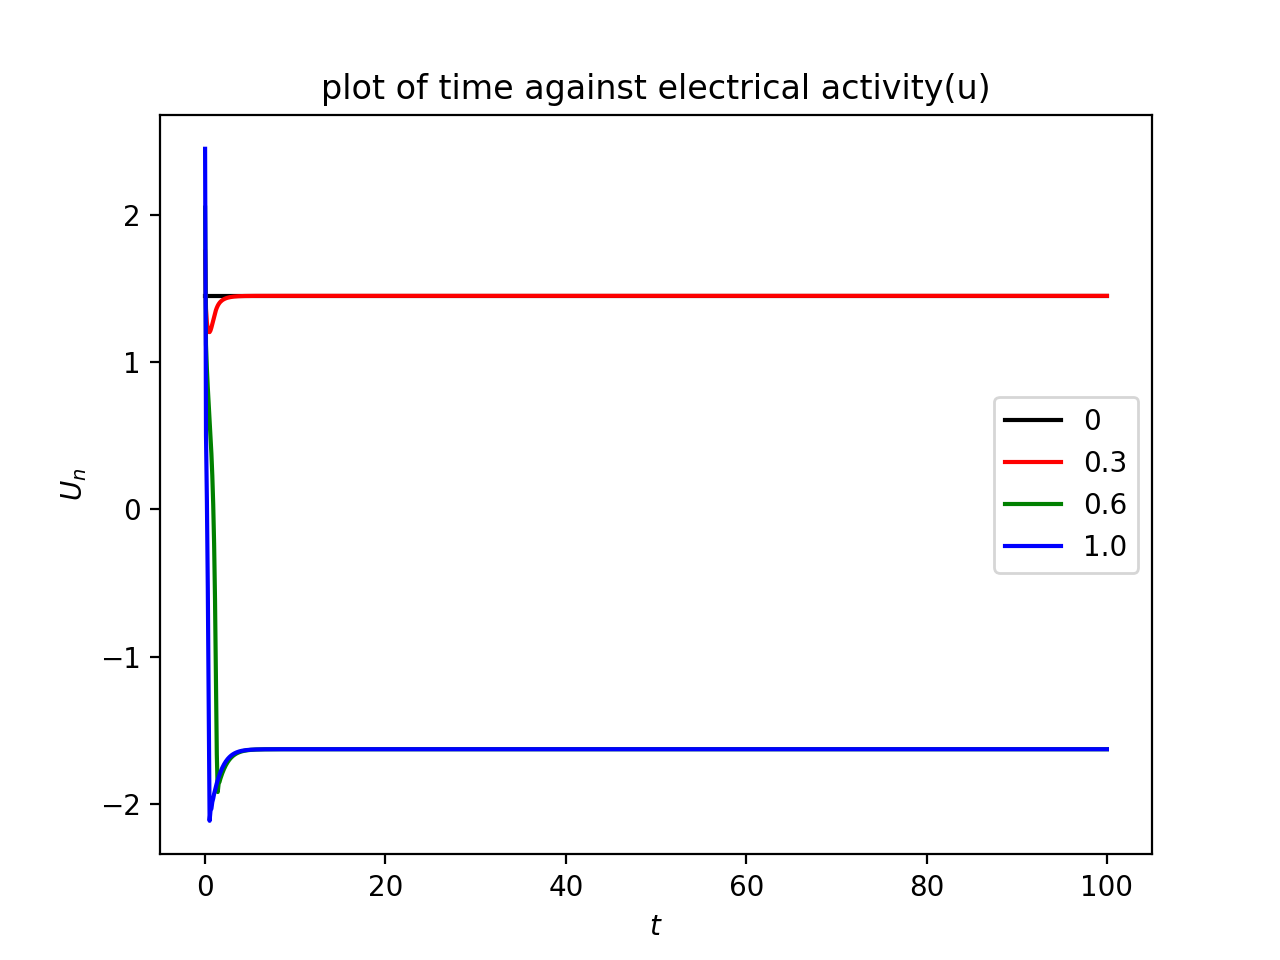

<IPython.core.display.Javascript object>


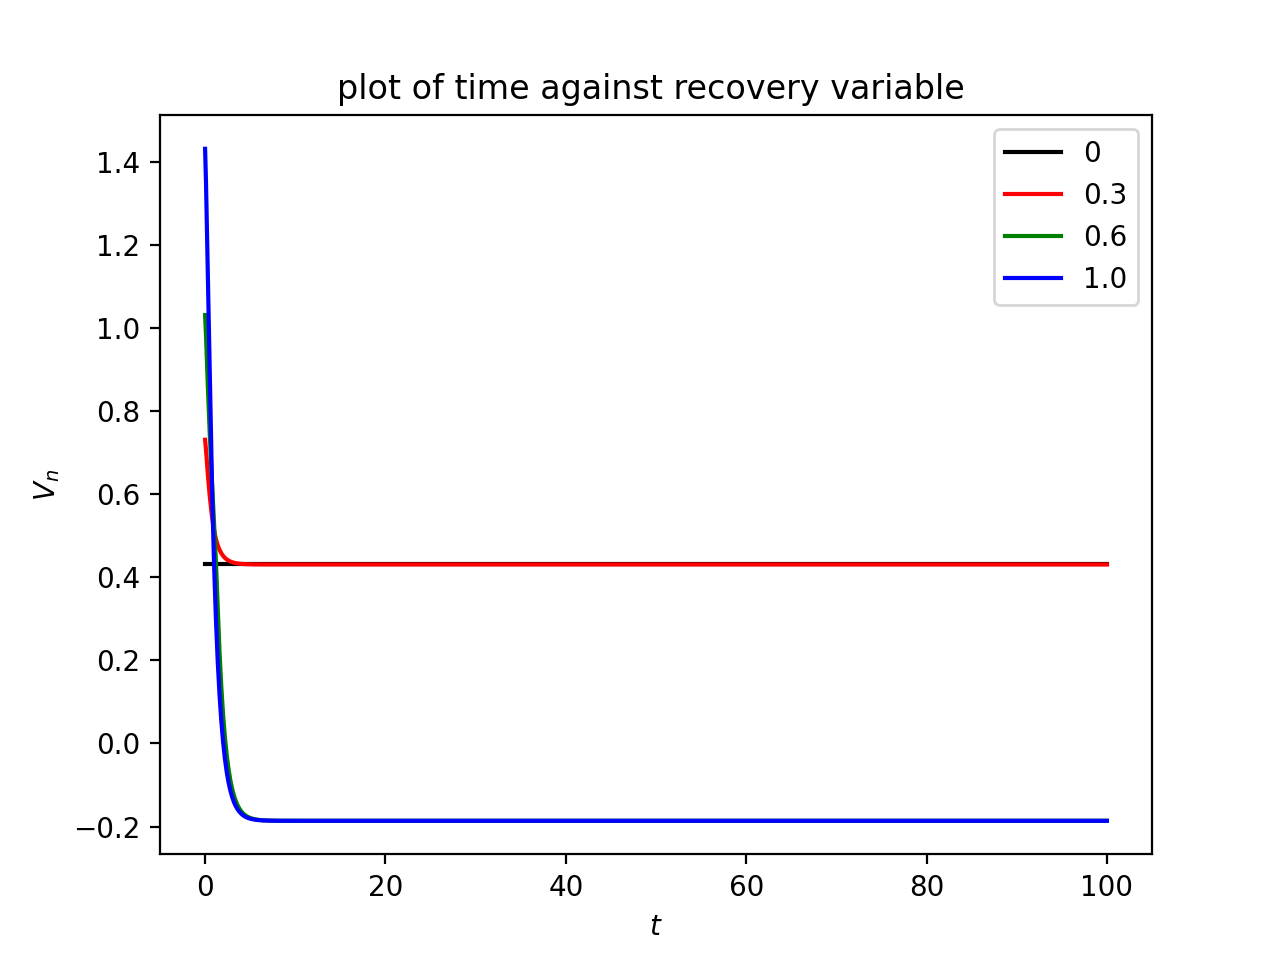

<IPython.core.display.Javascript object>


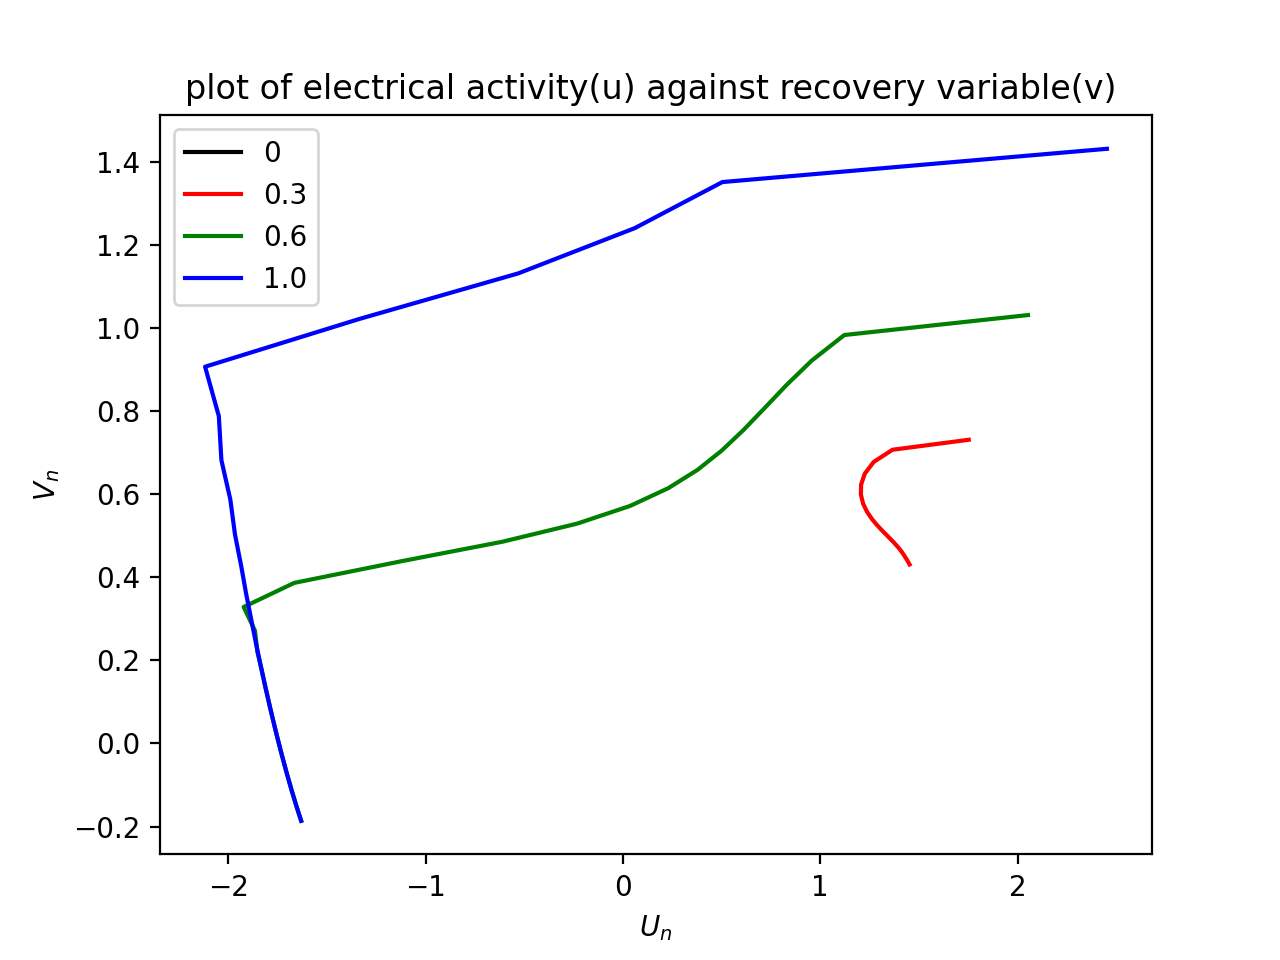

<IPython.core.display.Javascript object>


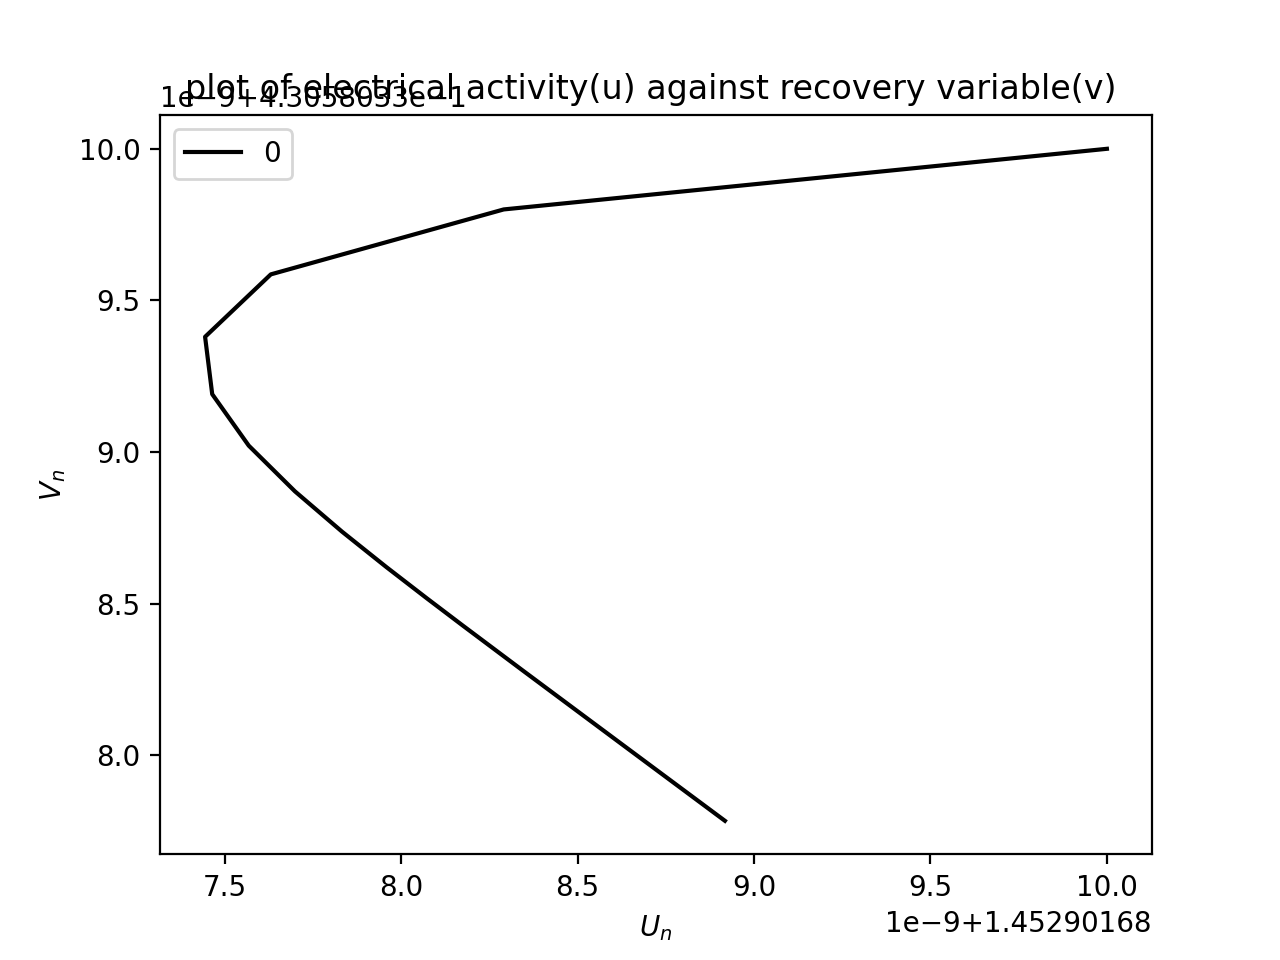

In [155]:
import numpy as np
import matplotlib.pyplot as plt
#numerical solution using initial condition [1.45290169+delta , 0.43058034+ delta ]

delta = [0, 0.3, 0.6, 1.0 ]
u0_1 = [1.45290169,  0.43058034]
u0_2 = [1.45290169+0.3,  0.43058034+0.3]
u0_3 = [1.45290169+0.6,  0.43058034+0.6]
u0_4 = [1.45290169+1.0,  0.43058034+1.0]


N=1000
def num(x):
    '''
    gives the U values and V values with time as 2 seperate arrays(to be used to plot)
    '''
    N = 1000 #number of points  
    # Compute the time points
    dt = (100 - 0)/ N
    t = np.linspace(0.0 , 100, N + 1)
    U_arr = np.zeros(N + 1)#create empty array to store our U and V values
    V_arr = np.zeros(N + 1)
    
    #initial conditions
    U_arr[0] , V_arr[0]  = x #short for U_array



    for n in range(N):#forward euler method
        U_arr[n + 1] = f( U_arr[n], V_arr[n] , I) * dt + U_arr[n]
        V_arr[n + 1] = g( U_arr[n], V_arr[n], I) * dt + V_arr[n]
        
    return U_arr, V_arr

m , n = num(u0_1)
q , w = num(u0_2)
e , r = num(u0_3)
i , o = num(u0_4)


t = np.linspace(0.0 , 100, N + 1)
#Plot of u against time for each corresponding starting point
fig, ax = plt.subplots()
ax.plot(t, m, "k-", label = '0')
ax.plot(t, q, "r-", label = '0.3')
ax.plot(t, e, "g-", label = '0.6')
ax.plot(t, i, "b-", label = '1.0')

ax.set(xlabel=r"$t$", ylabel=r"$U_n$")
plt.title("plot of time against electrical activity(u)")
ax.legend()

plt.show()

#plot of v against time for each corresponding starting point
fig, ax = plt.subplots()
ax.plot(t, n, "k-", label = '0')
ax.plot(t, w, "r-", label = '0.3')
ax.plot(t, r, "g-", label = '0.6')
ax.plot(t, o, "b-", label = '1.0')

ax.set(xlabel=r"$t$", ylabel=r"$V_n$")
plt.title("plot of time against recovery variable ")
ax.legend()
plt.show()

#plot of u against v for each corresponding starting point
fig, ax = plt.subplots()
ax.plot(m, n, "k-", label = '0')
ax.plot(q, w, "r-", label = '0.3')
ax.plot(e, r, "g-", label = '0.6')
ax.plot(i, o, "b-", label = '1.0')

ax.set(xlabel=r"$U_n$", ylabel=r"$V_n$")
plt.title("plot of electrical activity(u) against recovery variable(v) ")
ax.legend()
plt.show()

#graph of u agaisnt v for delta = 0
fig, ax = plt.subplots()
ax.plot(m, n, "k-", label = '0')
ax.set(xlabel=r"$U_n$", ylabel=r"$V_n$")
plt.title("plot of electrical activity(u) against recovery variable(v) ")
ax.legend()
plt.show()

    
    
    








    

In [156]:
#I = 0
#here we find the eigen values for each initial guess

u0_1 = [1.45290169,  0.43058034]
u0_2 = [1.45290169+0.3,  0.43058034+0.3]
u0_3 = [1.45290169+0.6,  0.43058034+0.6]
u0_4 = [1.45290169+1.0,  0.43058034+1.0]





print('fixed point 1 = ',resting_state(u0_1[0], u0_1[1], 0))
u , v = resting_state(u0_1[0], u0_1[1], 0)
evalue, evector = LA.eig(Jac(u,v ))
print('eigenvalue for first point =', evalue)

print('\nfixed point 2 =', resting_state(u0_2[0], u0_2[1], 0))
u , v = resting_state(u0_2[0], u0_2[1], 0)
evalue, evector = LA.eig(Jac(u,v ))
print('eigenvalue for 2nd point =', evalue)

print('\nfixed point 3 =',resting_state(u0_3[0], u0_3[1], 0))
u , v = resting_state(u0_3[0], u0_3[1], 0)
evalue, evector = LA.eig(Jac(u,v ))
print('eigenvalue for 3rd point =', evalue)

print('\nfixed point 4 =',resting_state(u0_4[0], u0_4[1], 0))
u , v = resting_state(u0_4[0], u0_4[1], 0)
evalue, evector = LA.eig(Jac(u,v ))
print('eigenvalue for 4th point =', evalue)




fixed point 1 =  [1.45290169 0.43058034]
eigenvalue for first point = [-5.32331246 -1.23130412]

fixed point 2 = [1.45290169 0.43058034]
eigenvalue for 2nd point = [-5.32331246 -1.23130412]

fixed point 3 = [1.45290169 0.43058034]
eigenvalue for 3rd point = [-5.32331246 -1.23130412]

fixed point 4 = [1.45290169 0.43058034]
eigenvalue for 4th point = [-5.32331246 -1.23130412]


***📝 Discussion for question 3.4***


part a)
we find that point 1 stable, converges towards the fixed point.


point 2 = fixed pont is a saddle point, unstable, attracting along one axis and repelling along another, due to having opposite signs on the eigenvalues.

point 3 = stable, converges towards the fixed point.


Hence, we conclude not all solutions/intial guesses return to the same fixed point on the vector field.


part b )

given stimulus I =  0

the graph of t against U and t against V implies that when delta = 0 and 0.3 (sufficiently close the initial guess), it converges to the same resting point. Whereas delta = 0.6 and 1.0 converges to another point . 

The graph of U against V, has a similar shape to that in 3.2 and between all of them, the same conclusion from discussion 3.2 when I=0 part 4 holds.



we find the eigenvalues and resting points to be all the same and are both negative when we find it analytically via the jacobian. Which implies that the system indeed converges towards a stable fixed point, However this contradicts our graphs, as our samples converge to 2 resting points as opposed to one for all.


In conclusion provided a guess is sufficiently close to a resting point that has both negative eigenvalues, they will always converge to that particular resting point. Our analytical(using jacobian) and graphical approach does not yield the same resting point.


